In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

In [2]:
def reduce_mem_usage(df):
    """Reduce numeric

    Args:
        df (pandas data frame object): 

    Returns:
        obj: reduced pandas data frame
    """
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    return df

In [31]:
data = pd.read_csv('https://raw.githubusercontent.com/KonstantinKlepikov/covid-kaliningrad/main/data/data.csv')
# data.index = pd.to_datetime(data.index)
# data['дата'] = pd.to_datetime(data['дата'])
data = reduce_mem_usage(data)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 73 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   дата                                             303 non-null    object 
 1   всего                                            303 non-null    float16
 2   infection rate                                   303 non-null    object 
 3   ОРВИ                                             303 non-null    float16
 4   пневмония                                        303 non-null    float16
 5   без симптомов                                    303 non-null    float16
 6   кол-во тестов                                    303 non-null    float16
 7   пенсионеры                                       303 non-null    float16
 8   мед.работники                                    303 non-null    float16
 9   пром.предприятия                

In [5]:
data[['дата', 'всего', 'ОРВИ', 'пневмония', 'без симптомов']]

,дата,всего,ОРВИ,пневмония,без симптомов
0,2020-03-08,1.0,0.0,0.0,0.0
1,2020-03-09,0.0,0.0,0.0,0.0
2,2020-03-10,0.0,0.0,0.0,0.0
3,2020-03-11,0.0,0.0,0.0,0.0
4,2020-03-12,1.0,0.0,0.0,0.0
...,...,...,...,...,...
298,2020-12-31,225.0,207.0,16.0,2.0
299,2021-01-01,221.0,179.0,35.0,7.0
300,2021-01-02,208.0,162.0,37.0,9.0
301,2021-01-03,216.0,157.0,49.0,10.0


In [6]:
data.drop(['учебные учреждения'], axis=1)

,дата,всего,infection rate,ОРВИ,пневмония,без симптомов,кол-во тестов,пенсионеры,мед.работники,пром.предприятия,...,Светлогорский городской округ,Пионерский городской округ,Неманский городской округ,Полесский городской округ,Краснознаменский городской округ,Озёрский городской округ,Янтарный городской округ,Мамоновский городской округ,Советский городской окру,другие регионы
0,2020-03-08,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-03-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-03-12,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2020-12-31,225.0,"1,057831325",207.0,16.0,2.0,2408.0,96.0,13.0,7.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
299,2021-01-01,221.0,"1,052380952",179.0,35.0,7.0,3080.0,27.0,35.0,5.0,...,5.0,3.0,7.0,1.0,1.0,2.0,1.0,2.0,17.0,0.0
300,2021-01-02,208.0,"1,025791325",162.0,37.0,9.0,3248.0,54.0,31.0,8.0,...,3.0,3.0,1.0,2.0,4.0,1.0,0.0,1.0,13.0,0.0
301,2021-01-03,216.0,"1,006944444",157.0,49.0,10.0,529.0,31.0,26.0,7.0,...,3.0,1.0,0.0,3.0,11.0,1.0,4.0,2.0,3.0,0.0


In [46]:
# df_dict = dict.fromkeys(data.columns, 'col')
data1 = data.reset_index()
data1 = data.drop(['дата', 'учебные учреждения'], axis=1)
data1.columns = range(data1.shape[1])
# data1 = data1.rename(columns = df_dict)
data1.replace(to_replace=0, value=np.nan, inplace=True)
data1

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,221.0,171.0,38.0,12.0,2100.0,37.0,40.0,6.0,11.0,6.0,...,6.0,5.0,3.0,8.0,1.0,6.0,3.0,5.0,18.0,NaN
298,225.0,207.0,16.0,2.0,2408.0,96.0,13.0,7.0,13.0,7.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,2.0,1.0,NaN
299,221.0,179.0,35.0,7.0,3080.0,27.0,35.0,5.0,16.0,13.0,...,5.0,3.0,7.0,1.0,1.0,2.0,1.0,2.0,17.0,NaN
300,208.0,162.0,37.0,9.0,3248.0,54.0,31.0,8.0,4.0,11.0,...,3.0,3.0,1.0,2.0,4.0,1.0,NaN,1.0,13.0,NaN


In [47]:
profile = ProfileReport(data1)

In [ ]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/79 [00:00<?, ?it/s]

/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
2021-01-

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

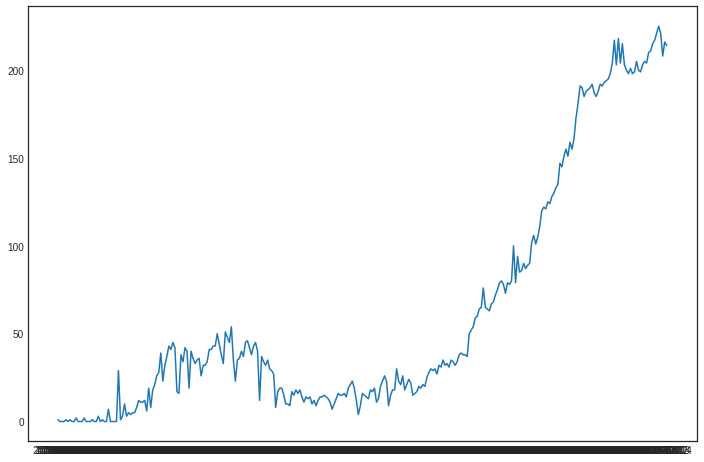

In [7]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(data['дата'], data['всего'], label='всего')
# ax.plot(data['дата'], data['ОРВИ'], '-g', label='симптомы орви')
# ax.plot(data['дата'], data['пневмония'], '-r', label='симптомы пневмонии')
# ax.plot(data['дата'], data['без симптомов'], '-c', label='без симптомов')
# ax.set(xlabel='прирост', ylabel='дни')


In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data['дата'])

0      2020-03-08
1      2020-03-09
2      2020-03-10
3      2020-03-11
4      2020-03-12
5      2020-03-13
6      2020-03-14
7      2020-03-15
8      2020-03-16
9      2020-03-17
10     2020-03-18
11     2020-03-19
12     2020-03-20
13     2020-03-21
14     2020-03-22
15     2020-03-23
16     2020-03-24
17     2020-03-25
18     2020-03-26
19     2020-03-27
20     2020-03-28
21     2020-03-29
22     2020-03-30
23     2020-03-31
24     2020-04-01
25     2020-04-02
26     2020-04-03
27     2020-04-04
28     2020-04-05
29     2020-04-06
30     2020-04-07
31     2020-04-08
32     2020-04-09
33     2020-04-10
34     2020-04-11
35     2020-04-12
36     2020-04-13
37     2020-04-14
38     2020-04-15
39     2020-04-16
40     2020-04-17
41     2020-04-18
42     2020-04-19
43     2020-04-20
44     2020-04-21
45     2020-04-22
46     2020-04-23
47     2020-04-24
48     2020-04-25
49     2020-04-26
50     2020-04-27
51     2020-04-28
52     2020-04-29
53     2020-04-30
54     2020-05-01
55     202

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    this = pd.read_csv('https://raw.githubusercontent.com/KonstantinKlepikov/covid-kaliningrad/main/data/data.csv', index_col='дата')
    print(this.index)

Index(['2020-03-08', '2020-03-09', '2020-03-10', '2020-03-11', '2020-03-12',
       '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       ...
       '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04'],
      dtype='object', name='дата', length=303)


In [10]:
data_test = data[['всего', 'ОРВИ', 'пневмония', 'без симптомов', 'кол-во тестов', 'выписали', 'умерли от ковид']].copy()

In [11]:
profile = ProfileReport(data_test)

In [12]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:216: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
/home/konstantin/anaconda3/envs/covid-kaliningrad/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, kee

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [13]:
data.set_index('дата', inplace=True)

In [14]:
data[['infection rate', 'всего']]

,infection rate,всего
дата,,
2020-03-08,0,1.0
2020-03-09,0,0.0
2020-03-10,0,0.0
2020-03-11,0,0.0
2020-03-12,0,1.0
...,...,...
2020-12-31,"1,057831325",225.0
2021-01-01,"1,052380952",221.0
2021-01-02,"1,025791325",208.0


In [15]:
data['infection rate']

дата
2020-03-08               0
2020-03-09               0
2020-03-10               0
2020-03-11               0
2020-03-12               0
                  ...     
2020-12-31     1,057831325
2021-01-01     1,052380952
2021-01-02     1,025791325
2021-01-03     1,006944444
2021-01-04    0,9783599089
Name: infection rate, Length: 303, dtype: object

In [16]:
data['infection rate'].reset_index()

,дата,infection rate
0,2020-03-08,0
1,2020-03-09,0
2,2020-03-10,0
3,2020-03-11,0
4,2020-03-12,0
...,...,...
298,2020-12-31,"1,057831325"
299,2021-01-01,"1,052380952"
300,2021-01-02,"1,025791325"
301,2021-01-03,"1,006944444"


In [19]:
source = pd.DataFrame(np.cumsum(np.random.randn(100, 3), 0).round(2),
                    columns=['alcohol', 'beer', 'coke'], index=pd.RangeIndex(100, name='x'))

In [20]:
source

,alcohol,beer,coke
x,,,
0,0.44,-0.35,1.73
1,-1.09,0.31,2.30
2,-0.88,-0.46,2.49
3,-0.55,-0.65,0.54
4,0.06,-0.54,-0.21
...,...,...,...
95,9.62,5.45,-3.10
96,7.15,6.26,-2.12
97,6.32,6.29,-1.10


In [21]:
source = source.reset_index().melt('x', var_name='category', value_name='y')
source

,x,category,y
0,0,alcohol,0.44
1,1,alcohol,-1.09
2,2,alcohol,-0.88
3,3,alcohol,-0.55
4,4,alcohol,0.06
...,...,...,...
295,95,coke,-3.10
296,96,coke,-2.12
297,97,coke,-1.10
298,98,coke,-0.33


In [26]:
df = data[['дата', 'infection rate']]
df.infection_rate = df.infection_rate.round(1)
df

SyntaxError: invalid syntax (<ipython-input-26-6dad1d725af5>, line 2)

In [34]:
df = data[['дата', 'infection rate']]
df['infection rate'] = df['infection rate'].apply(lambda x: x.replace(',', '.'))
df['infection rate'] = df['infection rate'].apply(lambda x: float(x))
df

<ipython-input-34-c75d849eee5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['infection rate'] = df['infection rate'].apply(lambda x: x.replace(',', '.'))
<ipython-input-34-c75d849eee5d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['infection rate'] = df['infection rate'].apply(lambda x: float(x))


,дата,infection rate
0,2020-03-08,0.00
1,2020-03-09,0.00
2,2020-03-10,0.00
3,2020-03-11,0.00
4,2020-03-12,0.00
...,...,...
299,2021-01-01,1.05
300,2021-01-02,1.03
301,2021-01-03,1.01
302,2021-01-04,0.98


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   дата            304 non-null    object 
 1   infection rate  304 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB
